In [4]:
# Prepare to start
# import sys
# sys.path.append('field')

# from plotting import plot

In [5]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


def plot(L, pad=.2):
    """ plot(iterable, padding=.2)
    
    draw dots via matplotlib
    """

    for i in L:
        plt.plot(i[0], i[1], 'o')
        
    xs = [i[0] for i in L]
    ys = [i[1] for i in L]
    xmin = min(xs)
    xmax = max(xs)
    ymin = min(ys)
    ymax = max(ys)
    
    xlen = xmax - xmin
    ylen = ymax - ymin
    
    xlen = xlen or 4
    ylen = ylen or 4
    
    plt.axis([xmin - xlen*pad, xmax + xlen*pad, ymin - ylen*pad, ymax + ylen*pad])
    plt.show()

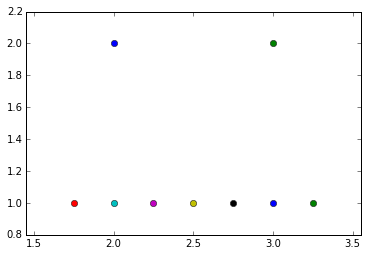

In [6]:
# Task 3.3.2

L = [
    [2,2], [3,2], 
    [1.75, 1], [2,1], [2.25,1], [2.5, 1], [2.75, 1], [3, 1], [3.25, 1]
]

plot(L)

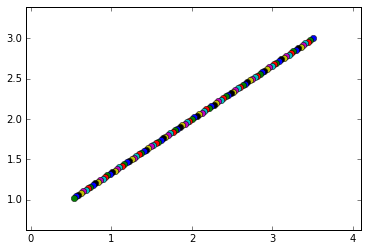

In [8]:
# Task 3.6.9

def segment(pt1, pt2):
    """ a hundred of dots from pt1 to pt2 """
    
    xdiff = pt2[0] - pt1[0]
    ydiff = pt2[1] - pt1[1]
    return [
        [pt1[0] + xdiff*i/100., pt1[1] + ydiff*i/100.] for i in range(100)]

plot(segment([3.5, 3], [0.5, 1 ]))

In [38]:
#
#  Vector
#
class Vec:
    def __init__(self, labels, function):
        self.D = labels
        self.f = function
    
    @staticmethod
    def zero(D): return Vec(D, {})
    
    def __repr__(self):
        return "Vec({0})".format(self.f) # todo to refine
    
    def setitem(self, d, val):
        self.f[d] = val
        return self
    
    def getitem(self, d, default=0):
        return self.f[d] if d in self.f else default
    
    def scalar_mul(self, alpha):
        return Vec(self.D, {d: alpha*self.getitem(d) for d in self.f})

    @staticmethod
    def add(u, v):
        return Vec(u.D, {d: u.getitem(d)+v.getitem(d) for d in u.D})

    def __add__(self, other):
        return Vec.add(self, other)

    def __mul__(self, alpha):
        return self.scalar_mul(alpha)
    
    def __rmul__(self, alpha):
        return self.scalar_mul(alpha)


In [10]:
# Task 3.12.1

f = open('vector/voting_record_dump109.txt', 'r')

def create_voting_dic(strlist):
    strlist = strlist.split(' ')
    return (strlist[0], {
        'party': strlist[1],
        'state': strlist[2],
        'votes': [int(x) for x in strlist[3:]]
    })
    
voting_dic ={name:val for name,val in [create_voting_dic(line) for line in f]}


voting_dic['Allen']['votes'][0:5]

[1, 1, 1, 1, 1]

In [11]:
# Task 3.12.2

def policy_compare(sen_a, sen_b, voting_dic):
    vote_a = voting_dic[sen_a]['votes']
    vote_b = voting_dic[sen_b]['votes']
    return sum([x*y for x,y in zip(vote_a, vote_b)])

policy_compare('Bond', 'Allen', voting_dic)

46

In [12]:
# Task 3.12.3

def most_similar(sen, voting_dic):
    others = list(filter(lambda x: x != sen, voting_dic.keys()))
    sims = {s:policy_compare(sen, s, voting_dic) for s in others}
    return max(sims.items(), key=lambda x:x[1])

most_similar('Hatch', voting_dic)

('Cochran', 45)

In [13]:
# Task 3.12.4

def least_similar(sen, voting_dic):
    others = list(filter(lambda x: x != sen, voting_dic.keys()))
    sims = {s:policy_compare(sen, s, voting_dic) for s in others}
    return min(sims.items(), key=lambda x:x[1])

least_similar('Hatch', voting_dic)
    

('Feingold', 3)

In [14]:
# Task 3.12.5

print(most_similar('Chafee', voting_dic))
print(most_similar('Santorum', voting_dic))


('Jeffords', 40)
('Grassley', 45)


In [15]:
# Task 3.12.7

def find_avarage_smilarity(sen, sen_set, voting_dict):
    return sum([policy_compare(sen, s, voting_dic) for s in sen_set]) / float(len(sen_set))

find_avarage_smilarity('Chafee', {'Allen', 'Hatch'}, voting_dic)

25.5

In [16]:
democrats = [name for name,val in voting_dic.items() if val['party'] == 'D']
sims = {n: find_avarage_smilarity(n, democrats, voting_dic) for n in voting_dic.keys()}
democrats_record = sorted(sims.items(), key=lambda x:-x[1])
democrats_record[0:5]

[('Biden', 34.86046511627907),
 ('Durbin', 34.674418604651166),
 ('Sarbanes', 34.674418604651166),
 ('Dodd', 34.13953488372093),
 ('Kennedy', 33.674418604651166)]

In [17]:
# Task 3.12.8
from functools  import reduce

init = [0 for x in range(46)]
def find_average_record(sen_set, voting_dic):
    aggred = reduce(lambda x, y: [a+b for a,b in zip(x, voting_dic[y]['votes'])], 
                    sen_set, init)
    return list(map(lambda x: float(x)/len(sen_set), aggred))

avarage_democrat_record = find_average_record(democrats, voting_dic)

In [18]:
def similar(vote_a, vote_b):
    return sum([x*y for x,y in zip(vote_a, vote_b)])

sims2 = {n:similar(voting_dic[n]['votes'], avarage_democrat_record) for n in voting_dic.keys()}
sorted(sims2.items(), key=lambda x:-x[1])[0:5]

[('Biden', 34.860465116279066),
 ('Durbin', 34.67441860465116),
 ('Sarbanes', 34.67441860465116),
 ('Dodd', 34.13953488372092),
 ('Kennedy', 33.67441860465116)]

In [19]:
# Task 3.12.9

def bitter_rivals(voting_dic):
    names = voting_dic.keys()
    return {(n,m): similar(voting_dic[n]['votes'], voting_dic[m]['votes'])
                for n in names for m in names if n != m}
    
rivals = bitter_rivals(voting_dic)
sorted(rivals.items(), key=lambda x:x[1])[0:5]

[(('Inhofe', 'Feingold'), -3),
 (('Feingold', 'Inhofe'), -3),
 (('Feingold', 'Bunning'), -2),
 (('Feingold', 'Ensign'), -2),
 (('Ensign', 'Feingold'), -2)]

# Problem

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

def draw_vector(to):
    ax = plt.axes()
    for t in to:
        if len(t) is not 4:
            t = [0, 0, t[0], t[1]]
        ax.arrow(*t)
    plt.xlim(-5, 10)
    plt.ylim(0, 10)
    plt.show()

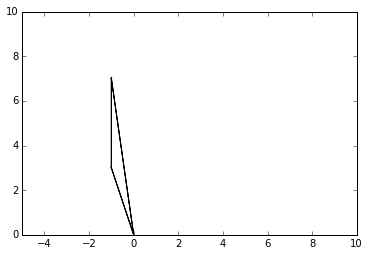

In [23]:
# 3.14.1
v = [-1, 3]
u = [0, 4]
# v + u
draw_vector([v, [-1, 3, 0, 4], [0, 0, -1, 7]])
# draw_vector(u)
# draw_vector(vu)


### 3.14.4
```
a = 1100000
b = 0110000
c = 0011000
d = 0001100
e = 0000110
f = 0000011



    0011000
    0001100
  + 0000110
  = 0010010

0010010 = c + d + e


    0110000
    0011000
    0001100
  + 0000110
  = 0100010

0100010 = b + c + d + e
```

### 3.14.5

```
a = 1110000
b = 0111000
c = 0011100
d = 0001110
e = 0000111
f = 0000011



    0011100
  + 0001110
  = 0010010

0010010 = c + d


    0111000
    0011100
  + 0001110
  = 0101010
 != 0100010
```

In [48]:
import os
import doctest

f = os.getcwd() + '/vector/vec.py'
doctest.testfile(f, False)


**********************************************************************
File "/Users/seoh/workspace/matrix/vector/vec.py", line 8, in vec.py
Failed example:
    v = Vec({'a','b','c', 'd'},{'a':2,'c':1,'d':3})
Exception raised:
    Traceback (most recent call last):
      File "/usr/local/Cellar/python3/3.4.3_1/Frameworks/Python.framework/Versions/3.4/lib/python3.4/doctest.py", line 1318, in __run
        compileflags, 1), test.globs)
      File "<doctest vec.py[0]>", line 1, in <module>
        v = Vec({'a','b','c', 'd'},{'a':2,'c':1,'d':3})
    NameError: name 'Vec' is not defined
**********************************************************************
File "/Users/seoh/workspace/matrix/vector/vec.py", line 9, in vec.py
Failed example:
    v['d']
Exception raised:
    Traceback (most recent call last):
      File "/usr/local/Cellar/python3/3.4.3_1/Frameworks/Python.framework/Versions/3.4/lib/python3.4/doctest.py", line 1318, in __run
        compileflags, 1), test.globs)
      File "<doc

TestResults(failed=55, attempted=55)